<a href="https://colab.research.google.com/github/BalajiJadhav015/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Bj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bike sharing prediction

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Capstone Projects/SeoulBikeData.csv',sep=',',encoding='latin')

In [ ]:
# First look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Exploratory Data Analysis

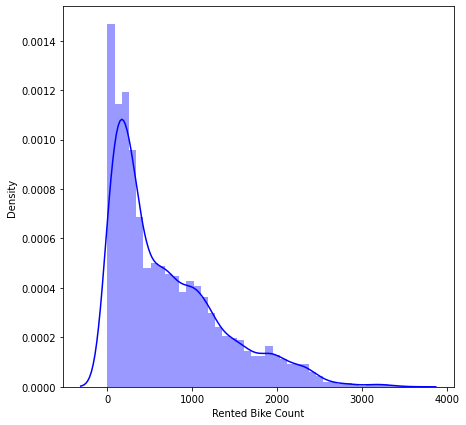

In [ ]:
# Dependent variable 'Rented Bike Count	'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="b")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

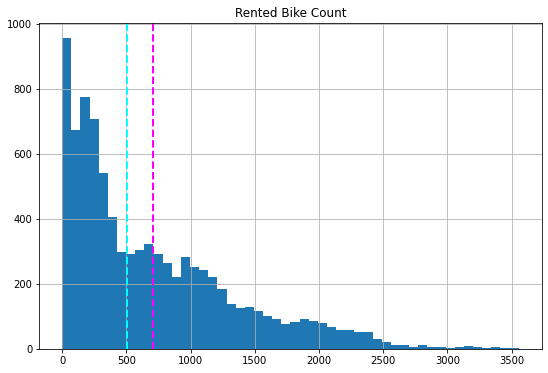

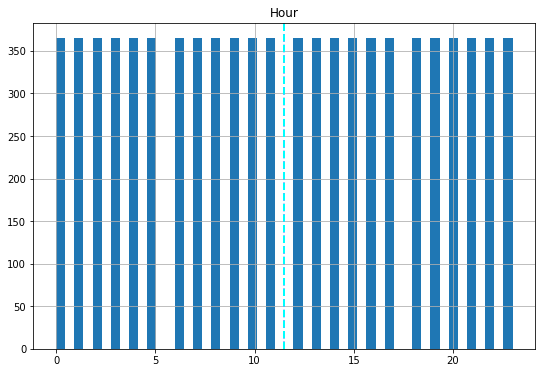

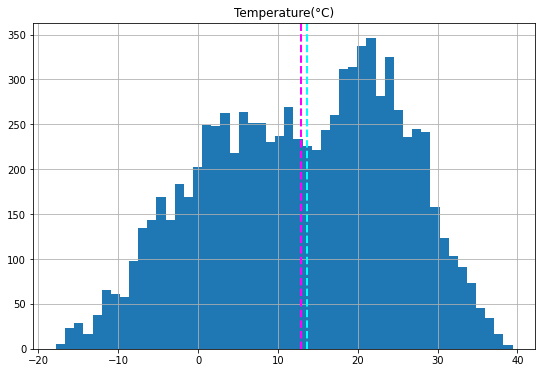

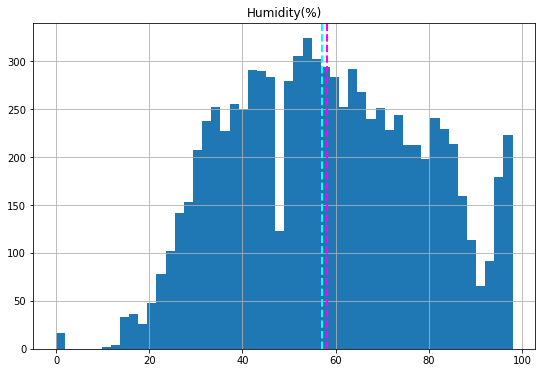

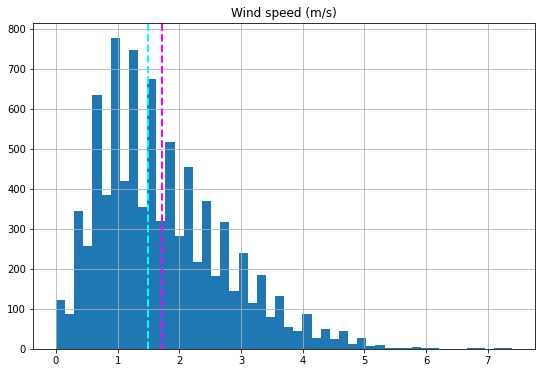

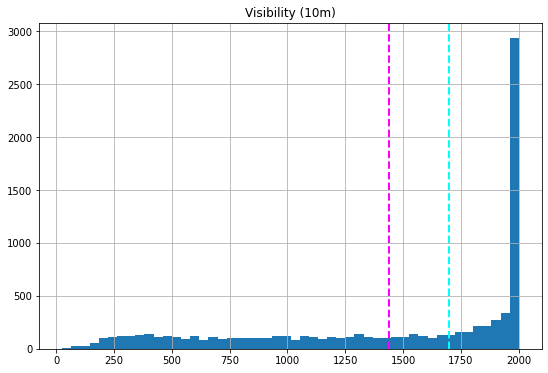

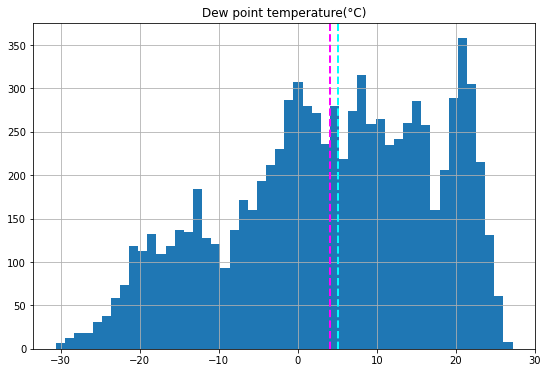

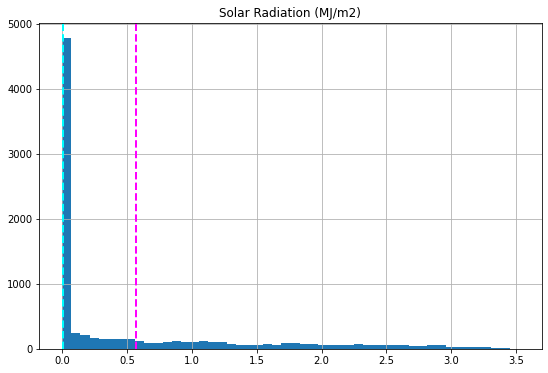

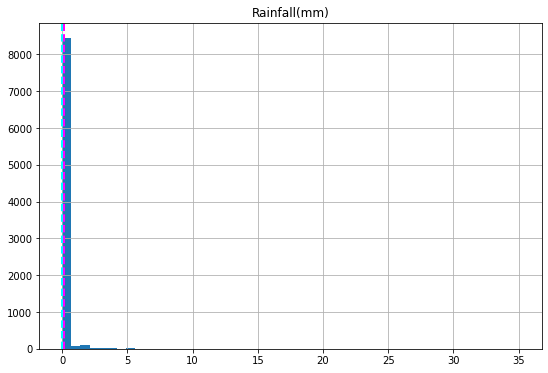

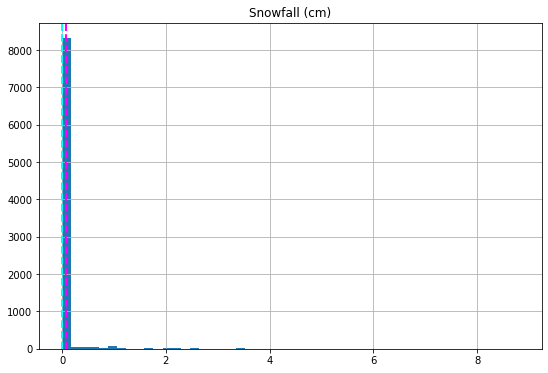

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

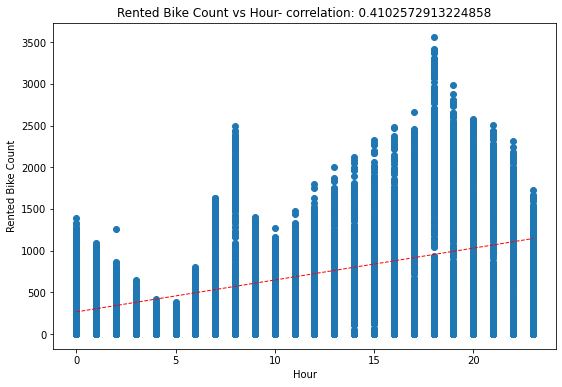

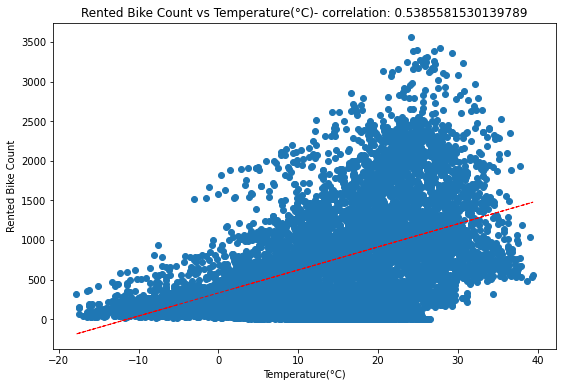

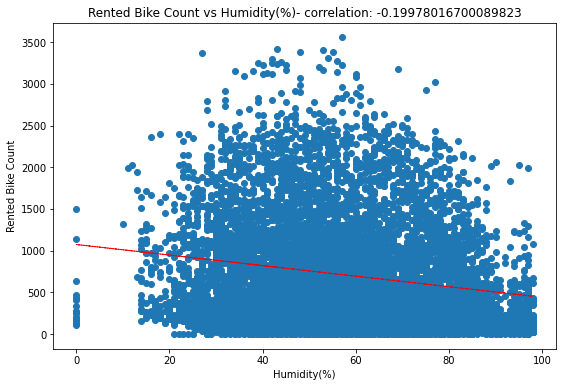

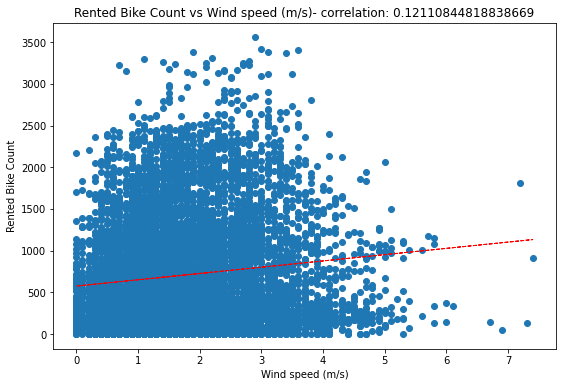

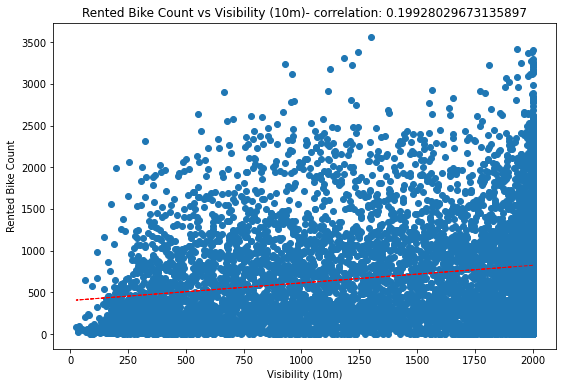

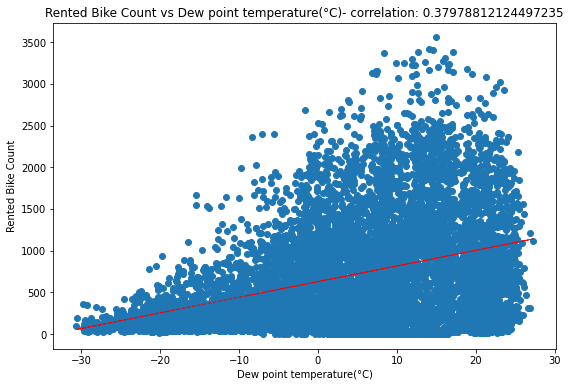

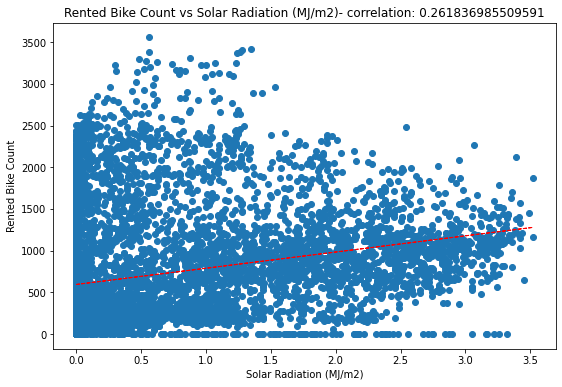

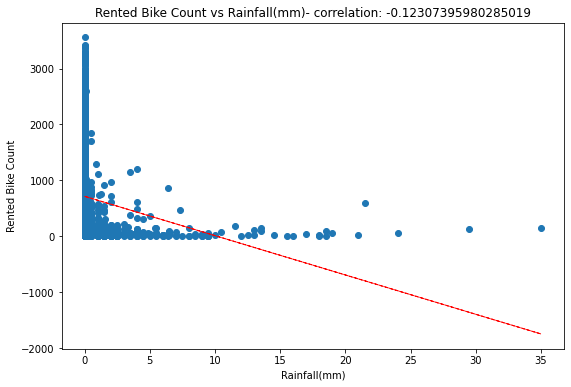

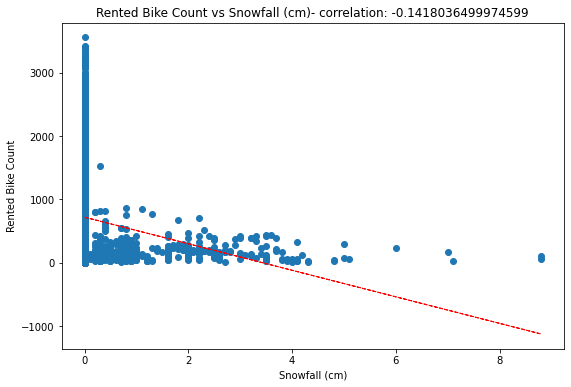

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

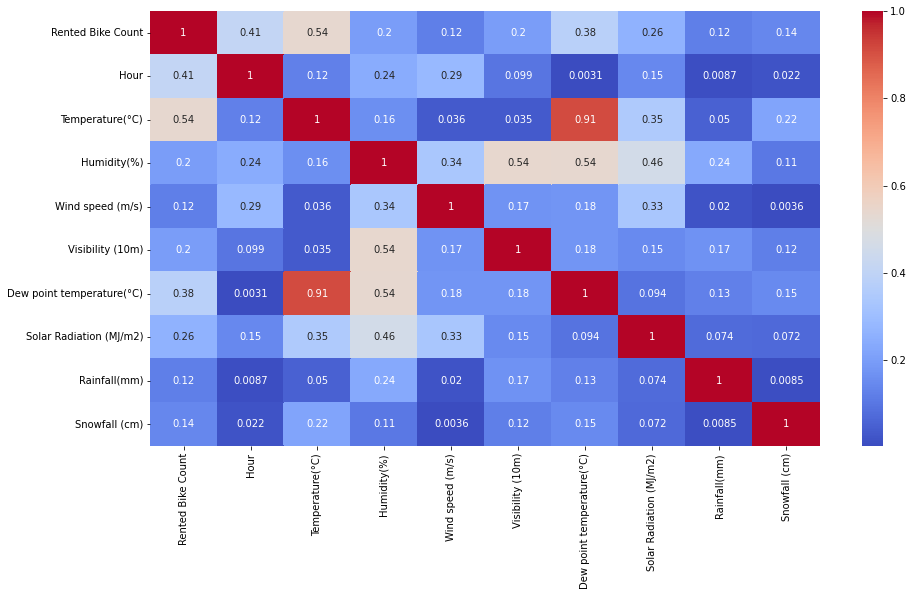

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date','Temperature(°C)']]])

,variables,VIF
0,Hour,3.847933
1,Humidity(%),5.262460
2,Wind speed (m/s),4.729187
3,Visibility (10m),4.964387
4,Dew point temperature(°C),1.656085
5,Solar Radiation (MJ/m2),1.914776
6,Rainfall(mm),1.079939
7,Snowfall (cm),1.111339


In [ ]:
categorical_features = df.describe(include=['object','category']).columns

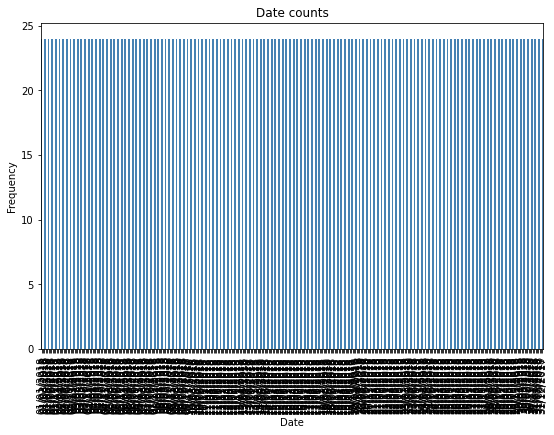

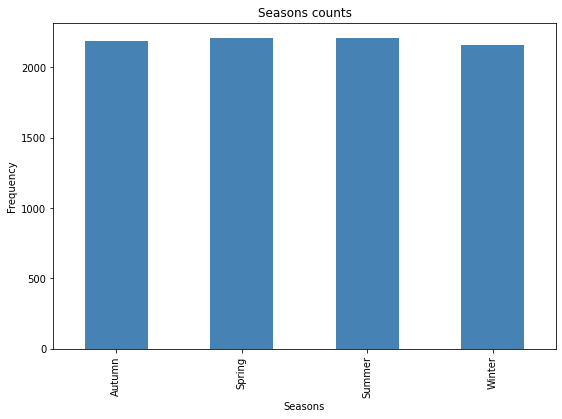

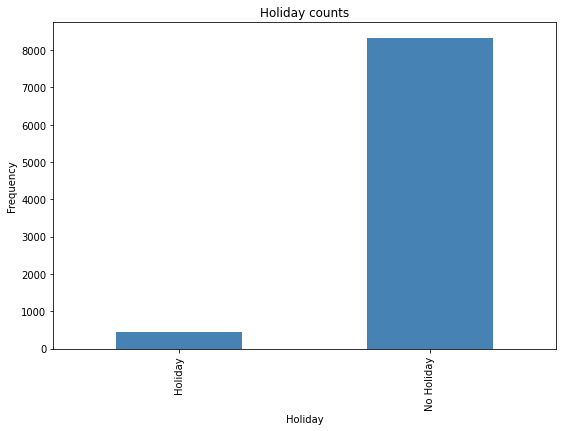

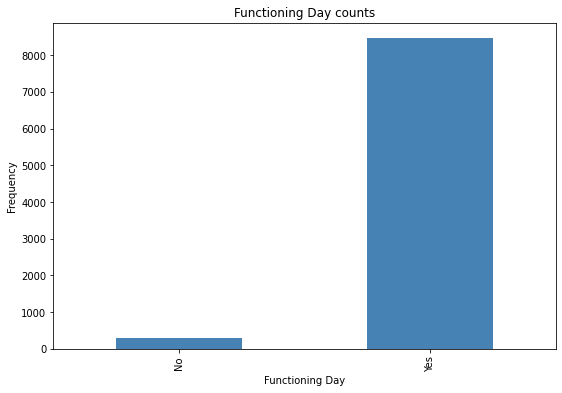

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

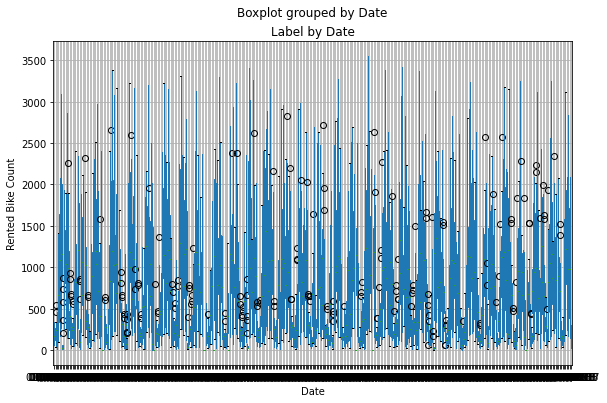

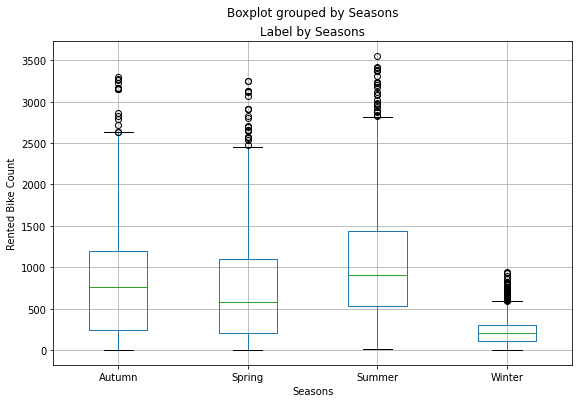

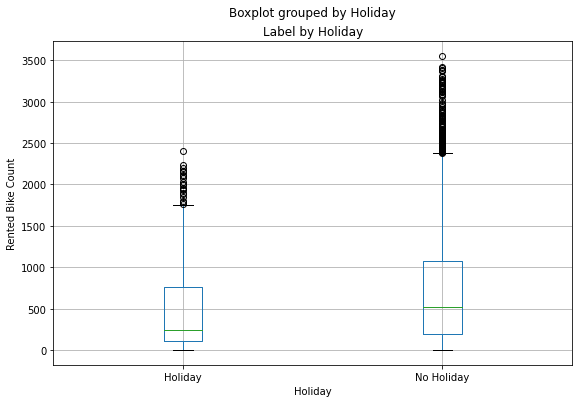

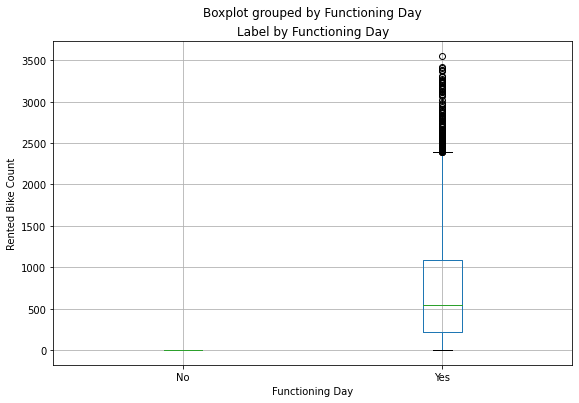

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

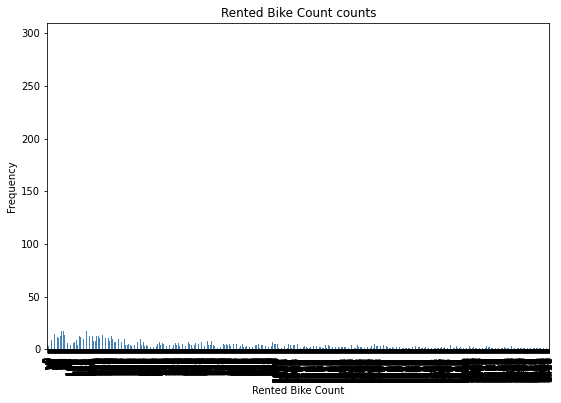

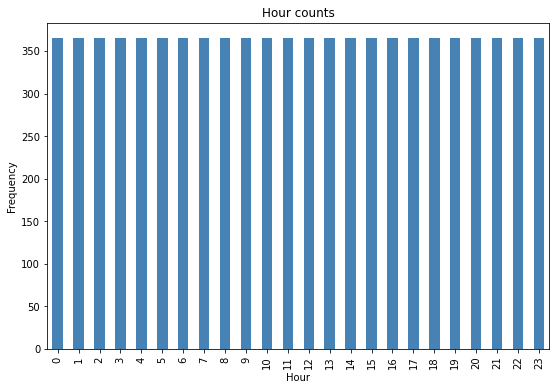

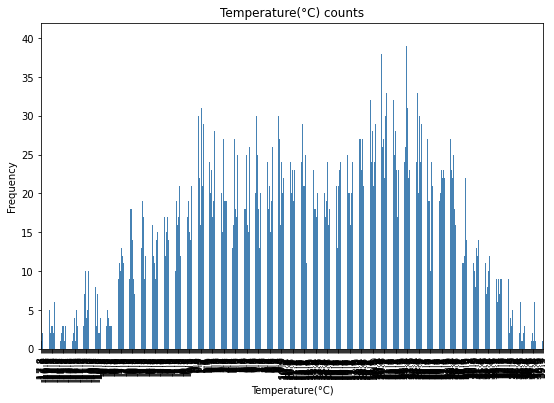

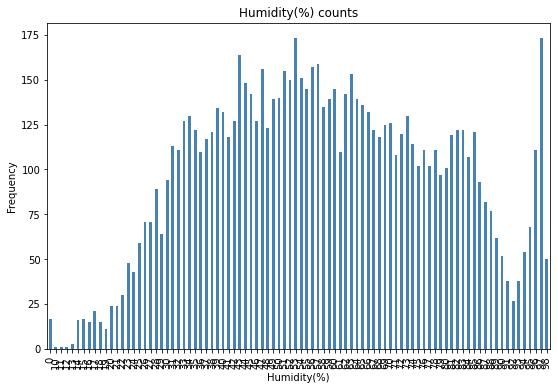

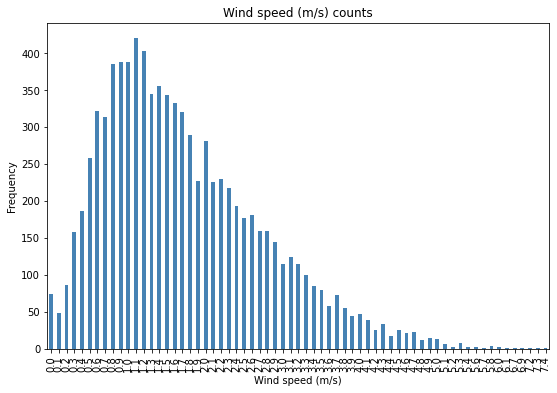

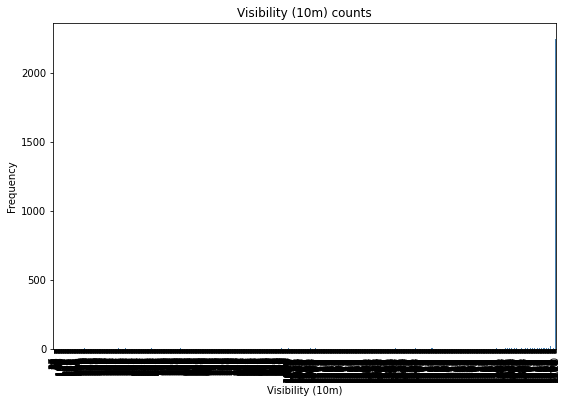

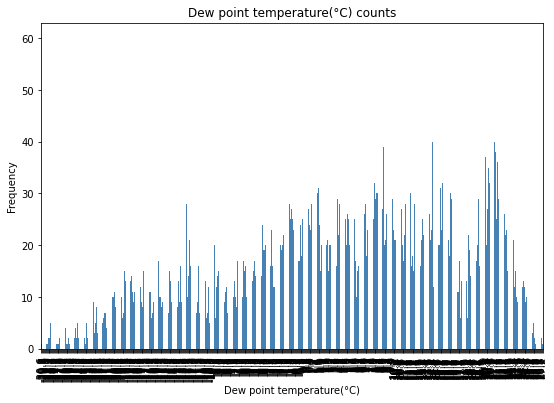

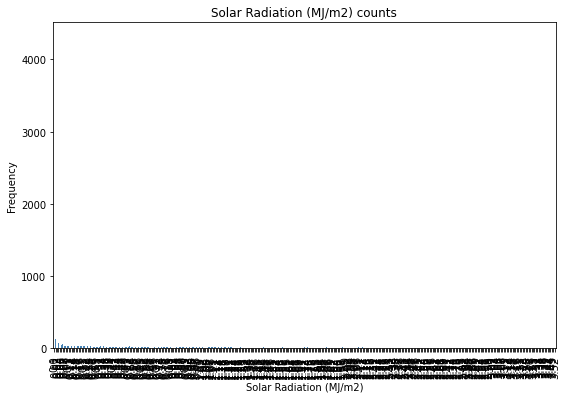

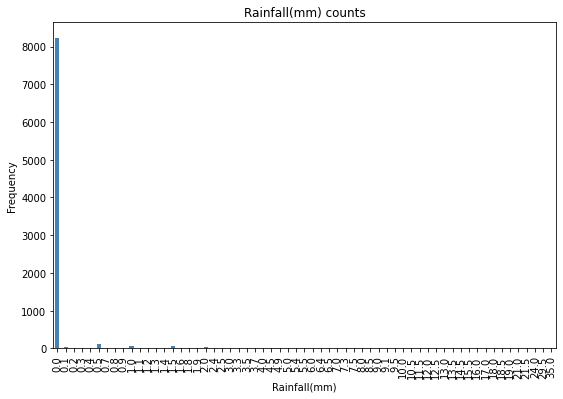

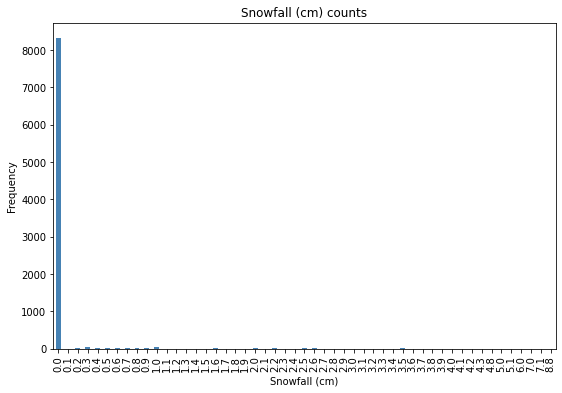

In [ ]:
for col in numeric_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

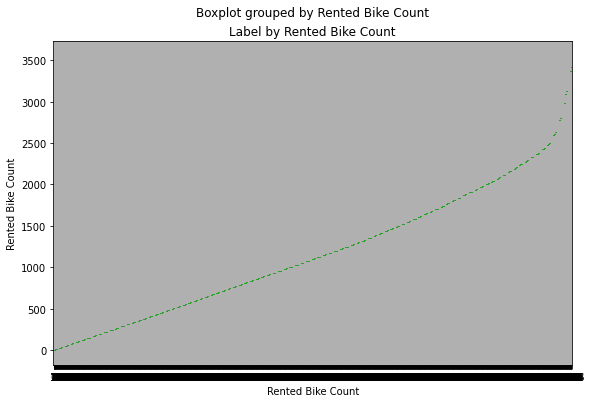

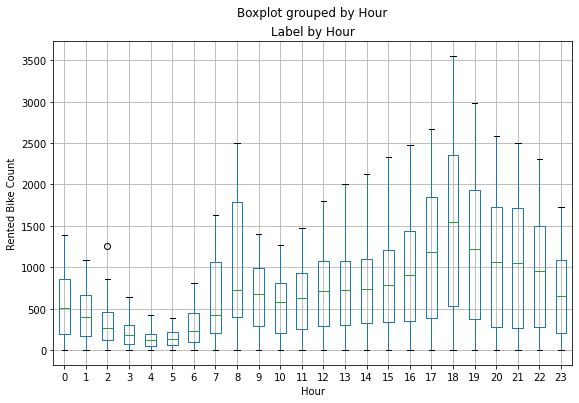

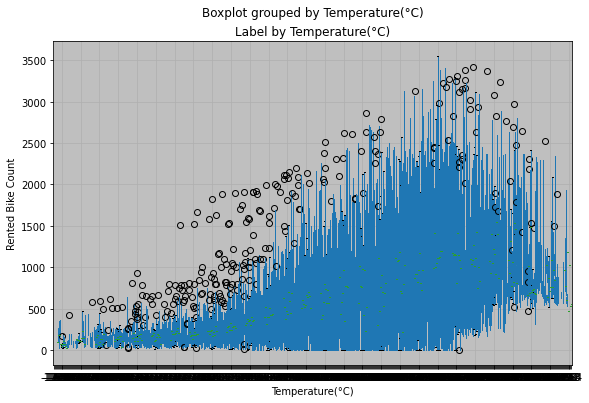

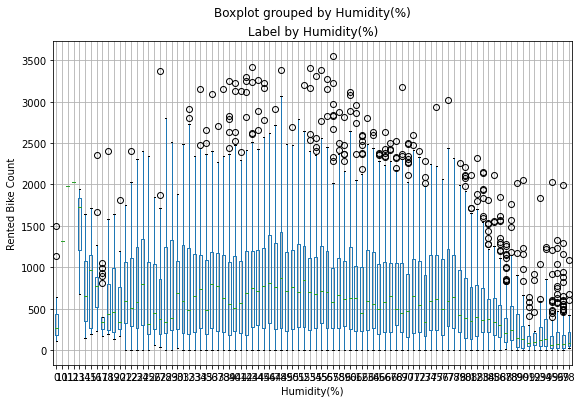

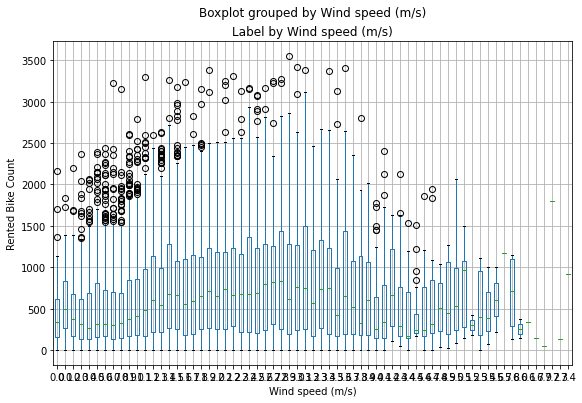

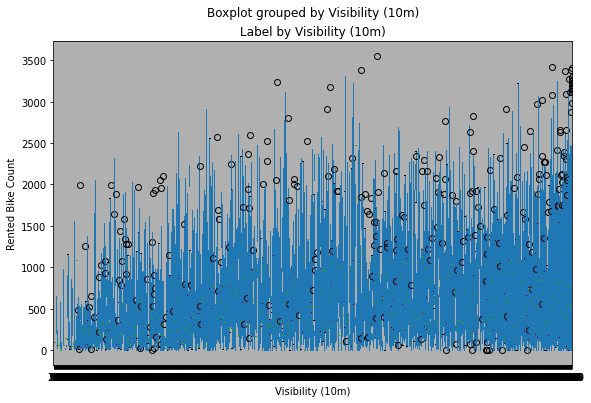

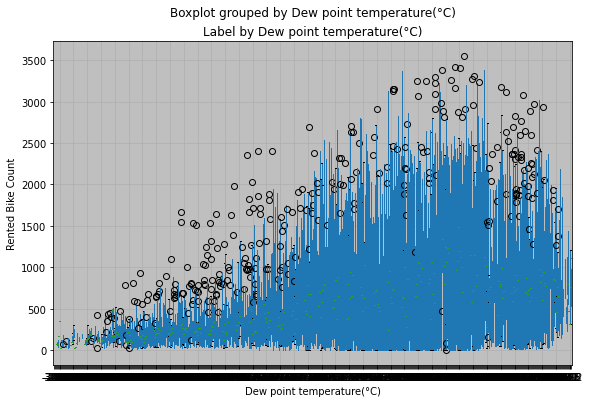

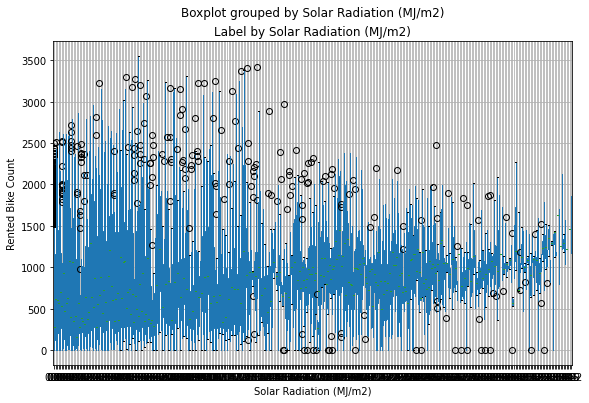

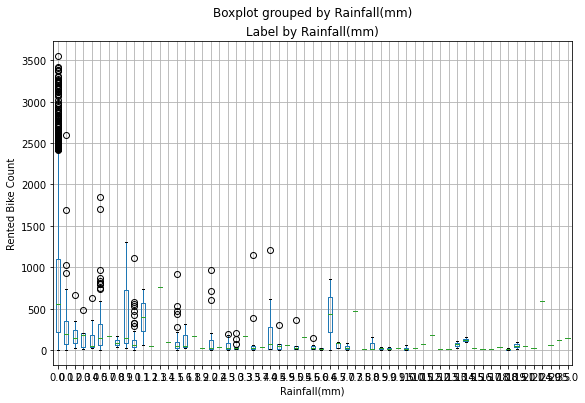

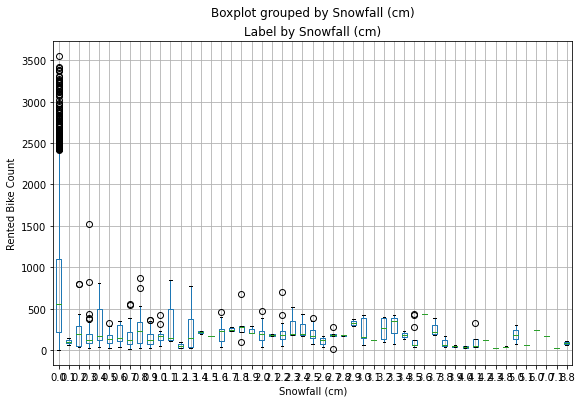

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [ ]:
a = df [['Seasons','Holiday','Functioning Day']]

In [ ]:
a

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
a = pd.get_dummies(a, drop_first = True)

In [ ]:
a.head(25)

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
5,0,0,1,1,1
6,0,0,1,1,1
7,0,0,1,1,1
8,0,0,1,1,1
9,0,0,1,1,1


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Seasons_Spring       8760 non-null   uint8
 1   Seasons_Summer       8760 non-null   uint8
 2   Seasons_Winter       8760 non-null   uint8
 3   Holiday_No Holiday   8760 non-null   uint8
 4   Functioning Day_Yes  8760 non-null   uint8
dtypes: uint8(5)
memory usage: 42.9 KB


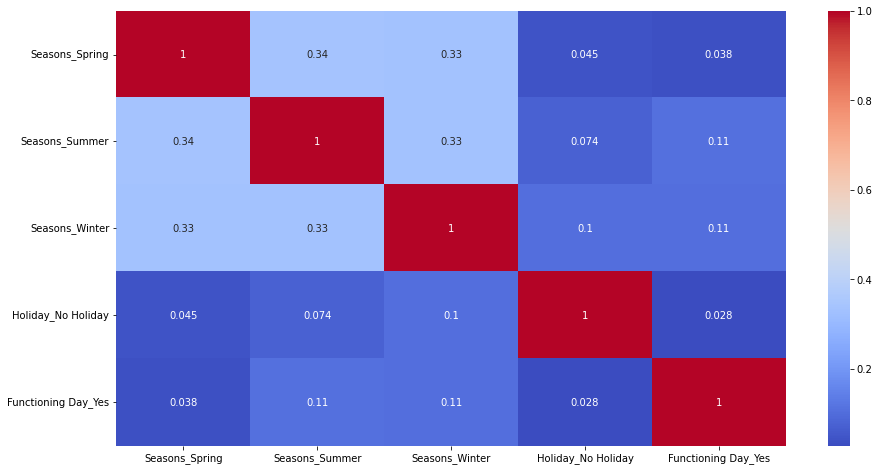

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = a.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df1 = df.loc[ :,['Hour','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Rented Bike Count']]

In [ ]:
df2 = pd.concat([a, df1.reindex(a.index)], axis=1)

In [ ]:
df2

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,1,1,1,0,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,0,0,1,1,1,1,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,0,0,1,1,1,2,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,0,0,1,1,1,3,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,0,0,1,1,1,4,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,19,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,0,0,0,1,1,20,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,0,0,0,1,1,21,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,0,0,0,1,1,22,41,1.0,1859,-9.8,0.0,0.0,0.0,712


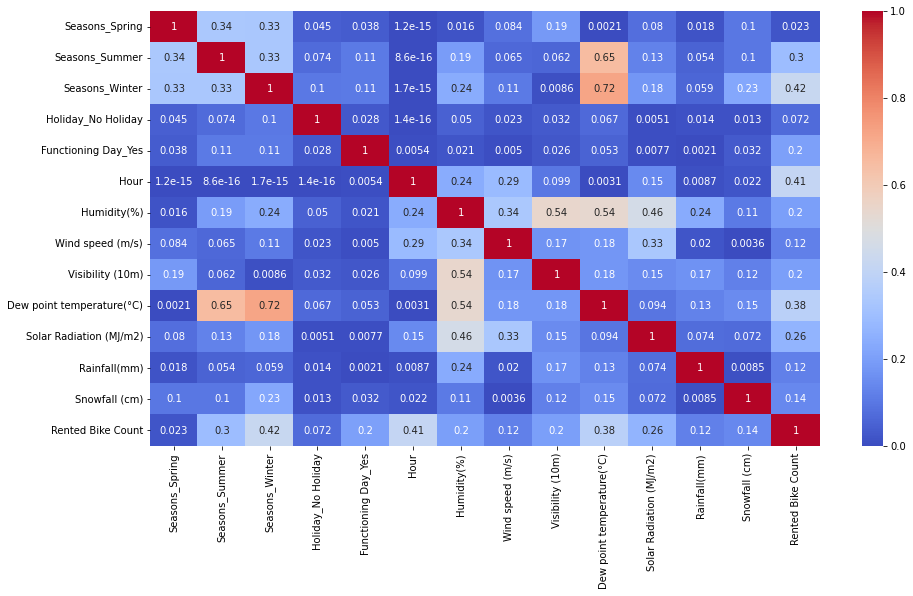

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Seasons_Spring,2.247870
1,Seasons_Summer,3.479460
2,Seasons_Winter,4.367364
3,Holiday_No Holiday,17.732095
4,Functioning Day_Yes,25.247531
5,Hour,4.186981
6,Humidity(%),20.004756
7,Wind speed (m/s),4.874242
8,Visibility (10m),7.398036
9,Dew point temperature(°C),6.941760


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count','Humidity(%)']]])

,variables,VIF
0,Seasons_Spring,2.235657
1,Seasons_Summer,3.193689
2,Seasons_Winter,3.936010
3,Holiday_No Holiday,14.350320
4,Functioning Day_Yes,18.931160
5,Hour,4.100417
6,Wind speed (m/s),4.841896
7,Visibility (10m),7.293930
8,Dew point temperature(°C),4.182697
9,Solar Radiation (MJ/m2),1.745500


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Holiday_No Holiday']]])

,variables,VIF
0,Seasons_Spring,2.208779
1,Seasons_Summer,3.190881
2,Seasons_Winter,3.915196
3,Functioning Day_Yes,12.401891
4,Hour,4.069791
5,Wind speed (m/s),4.820252
6,Visibility (10m),6.868323
7,Dew point temperature(°C),4.089030
8,Solar Radiation (MJ/m2),1.745041
9,Rainfall(mm),1.061598


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Holiday_No Holiday','Functioning Day_Yes']]])

,variables,VIF
0,Seasons_Spring,1.688789
1,Seasons_Summer,3.113472
2,Seasons_Winter,2.874440
3,Hour,3.892661
4,Wind speed (m/s),4.749835
5,Visibility (10m),4.350550
6,Dew point temperature(°C),3.627710
7,Solar Radiation (MJ/m2),1.744339
8,Rainfall(mm),1.055955
9,Snowfall (cm),1.091704


In [ ]:
df2

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,1,1,1,0,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,0,0,1,1,1,1,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,0,0,1,1,1,2,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,0,0,1,1,1,3,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,0,0,1,1,1,4,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,19,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,0,0,0,1,1,20,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,0,0,0,1,1,21,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,0,0,0,1,1,22,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [ ]:
df3 = df2.copy()

In [ ]:
df3

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,1,1,1,0,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,0,0,1,1,1,1,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,0,0,1,1,1,2,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,0,0,1,1,1,3,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,0,0,1,1,1,4,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,19,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,0,0,0,1,1,20,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,0,0,0,1,1,21,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,0,0,0,1,1,22,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [ ]:
df3.drop(['Humidity(%)','Holiday_No Holiday','Functioning Day_Yes'], axis=1, inplace=True)

In [ ]:
df3

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour,Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,1,0,2.2,2000,-17.6,0.0,0.0,0.0,254
1,0,0,1,1,0.8,2000,-17.6,0.0,0.0,0.0,204
2,0,0,1,2,1.0,2000,-17.7,0.0,0.0,0.0,173
3,0,0,1,3,0.9,2000,-17.6,0.0,0.0,0.0,107
4,0,0,1,4,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,19,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,0,0,0,20,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,0,0,0,21,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,0,0,0,22,1.0,1859,-9.8,0.0,0.0,0.0,712


In [ ]:
df4 = df3.copy()

In [ ]:
df4

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour,Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0,0,1,0,2,2000,0,0,0,254
1,0,0,1,1,0,2000,0,0,0,204
2,0,0,1,2,1,2000,0,0,0,173
3,0,0,1,3,0,2000,0,0,0,107
4,0,0,1,4,2,2000,0,0,0,78
...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,19,2,1894,0,0,0,1003
8756,0,0,0,20,2,2000,0,0,0,764
8757,0,0,0,21,0,1968,0,0,0,694
8758,0,0,0,22,1,1859,0,0,0,712


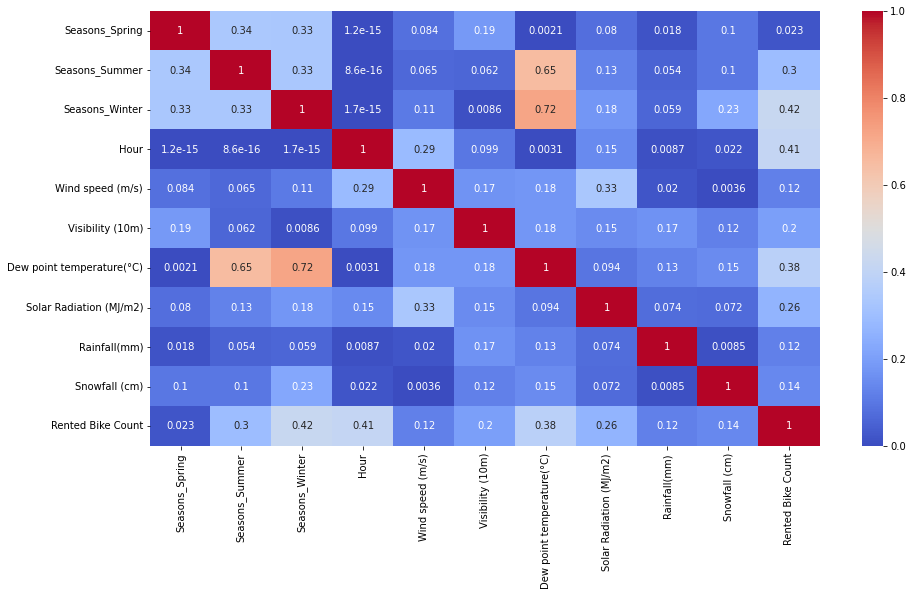

In [ ]:
## Correlation 
plt.figure(figsize=(15,8)) 
correlation = df3.corr() 
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
calc_vif(df2[[i for i in df3.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Seasons_Spring,1.688789
1,Seasons_Summer,3.113472
2,Seasons_Winter,2.874440
3,Hour,3.892661
4,Wind speed (m/s),4.749835
5,Visibility (10m),4.350550
6,Dew point temperature(°C),3.627710
7,Solar Radiation (MJ/m2),1.744339
8,Rainfall(mm),1.055955
9,Snowfall (cm),1.091704


In [ ]:
df3.drop(['Dew point temperature(°C)'], axis=1, inplace=True)

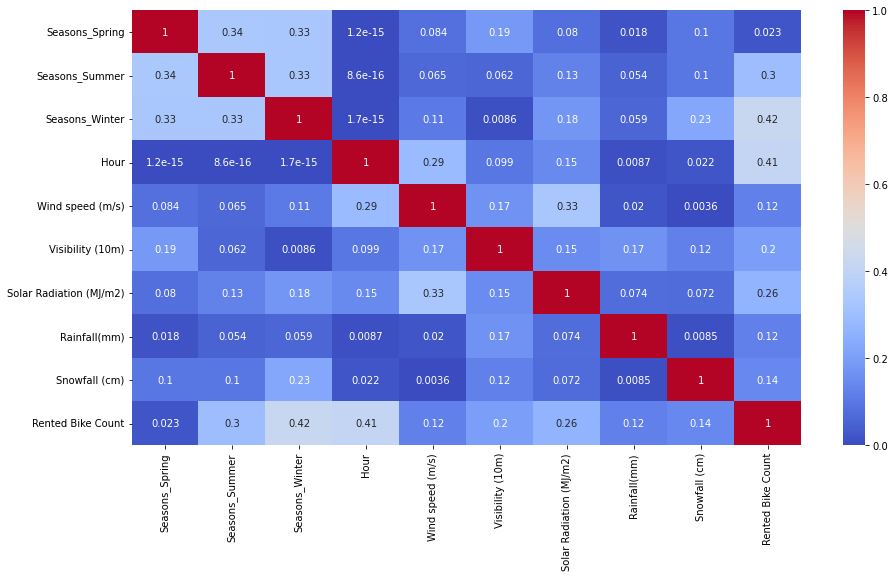

In [ ]:
## Correlation 
plt.figure(figsize=(15,8)) 
correlation = df3.corr() 
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
calc_vif(df3[[i for i in df3.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Seasons_Spring,1.665836
1,Seasons_Summer,1.715686
2,Seasons_Winter,1.860936
3,Hour,3.699768
4,Wind speed (m/s),4.749772
5,Visibility (10m),4.339022
6,Solar Radiation (MJ/m2),1.739460
7,Rainfall(mm),1.040694
8,Snowfall (cm),1.088666


In [ ]:
df3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df3.replace([np.inf, -np.inf], np.nan).dropna(axis=0, inplace= True)

In [ ]:
df3.dropna(inplace= True)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
clean_dataset(df3)

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Hour,Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,0.0,0.0,1.0,0.0,2.2,2000.0,0.0,0.0,0.0,254.0
1,0.0,0.0,1.0,1.0,0.8,2000.0,0.0,0.0,0.0,204.0
2,0.0,0.0,1.0,2.0,1.0,2000.0,0.0,0.0,0.0,173.0
3,0.0,0.0,1.0,3.0,0.9,2000.0,0.0,0.0,0.0,107.0
4,0.0,0.0,1.0,4.0,2.3,2000.0,0.0,0.0,0.0,78.0
...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,19.0,2.6,1894.0,0.0,0.0,0.0,1003.0
8756,0.0,0.0,0.0,20.0,2.3,2000.0,0.0,0.0,0.0,764.0
8757,0.0,0.0,0.0,21.0,0.3,1968.0,0.0,0.0,0.0,694.0
8758,0.0,0.0,0.0,22.0,1.0,1859.0,0.0,0.0,0.0,712.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seasons_Spring           8760 non-null   uint8  
 1   Seasons_Summer           8760 non-null   uint8  
 2   Seasons_Winter           8760 non-null   uint8  
 3   Hour                     8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Rented Bike Count        8760 non-null   int64  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 573.2 KB


In [ ]:
df3['Seasons_Spring'] = df3['Seasons_Spring'].astype('int')
df3['Seasons_Summer'] = df3['Seasons_Summer'].astype('int')
df3['Seasons_Winter'] = df3['Seasons_Winter'].astype('int')
df3['Wind speed (m/s)'] = df3['Wind speed (m/s)'].astype('int')
df3['Solar Radiation (MJ/m2)'] = df3['Solar Radiation (MJ/m2)'].astype('int')
df3['Rainfall(mm)'] = df3['Rainfall(mm)'].astype('int')
df3['Snowfall (cm)'] = df3['Snowfall (cm)'].astype('int')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Seasons_Spring           8760 non-null   int64
 1   Seasons_Summer           8760 non-null   int64
 2   Seasons_Winter           8760 non-null   int64
 3   Hour                     8760 non-null   int64
 4   Wind speed (m/s)         8760 non-null   int64
 5   Visibility (10m)         8760 non-null   int64
 6   Solar Radiation (MJ/m2)  8760 non-null   int64
 7   Rainfall(mm)             8760 non-null   int64
 8   Snowfall (cm)            8760 non-null   int64
 9   Rented Bike Count        8760 non-null   int64
dtypes: int64(10)
memory usage: 752.8 KB


In [ ]:
dependent_variable = 'Rented Bike Count'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df3.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['Seasons_Summer',
 'Seasons_Winter',
 'Seasons_Spring',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Snowfall (cm)',
 'Hour']

In [ ]:
# Create the data of independent variables
X = df3[independent_variables].values

# Create the dependent variable data
y = df3[dependent_variable].values

In [ ]:
# features = ['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Hour' ,'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [ ]:
#Train test split
# from scipy.stats import zscore
# X = df3[features].apply(zscore)
# X = df3[features]

In [ ]:
# y = np.log10(df3['Rented Bike Count'])

In [ ]:
#from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 9)
(1752, 9)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# X_test.fillna(X_train.mean(), inplace=True)

In [ ]:
# y_test.fillna(y_train.mean(), inplace=True)

In [ ]:
# X_test = X_test.fillna(X_train.mean())

In [ ]:
# y_test = X_test.fillna(y_train.mean())

In [ ]:
# np.any(np.isnan(df3))

In [ ]:
# np.all(np.isfinite(df3))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_train, y_train)

0.42550169616786715

In [ ]:
reg.coef_

array([  226.07414475,  -575.30888083,   -52.55084704,   251.92196269,
         129.83088222, -2378.83912966,   151.98100695,  -269.70029804,
         821.61363794])

In [ ]:
len(reg.coef_)

9

In [ ]:
reg.intercept_

185.05033850257837

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 510.1357193 ,  526.96423425,  422.87046216, ...,  402.96872305,
       1241.41087594,  455.51957008])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 253841.01621623826
RMSE : 503.8263750700615


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.39348311603993136
Adjusted R2 :  0.3903495615303788


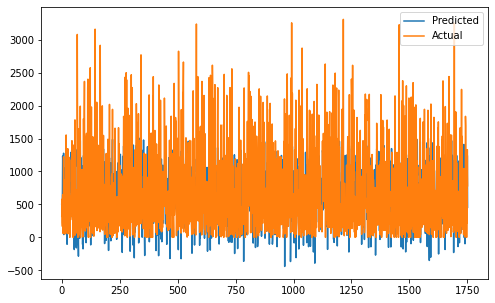

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.4255016961312945

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -239105.75180268651


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

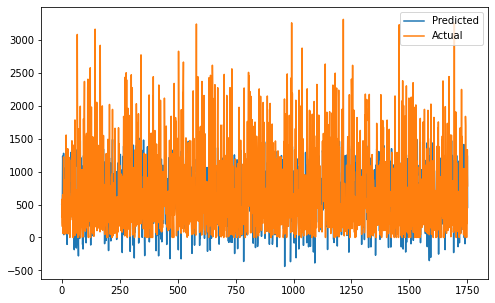

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 253848.18357768486
RMSE : 503.83348794783865
R2 : 0.3934659906525705
Adjusted R2 :  0.3903323476651268


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -238896.63736413702


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 253845.4356179081
RMSE : 503.83076088892005
R2 : 0.3934725565103103
Adjusted R2 :  0.3903389474452086


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.3844116898052322

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 271662.8094551851
RMSE : 521.2128254899193
R2 : 0.35090048434790166
Adjusted R2 :  0.34754692772283347


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.7}

Using  {'alpha': 0.0001, 'l1_ratio': 0.7}  the negative mean squared error is:  -239100.14710997092


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 253935.04511257148
RMSE : 503.91968121176956
R2 : 0.3932584474105022
Adjusted R2 :  0.3901237321560215


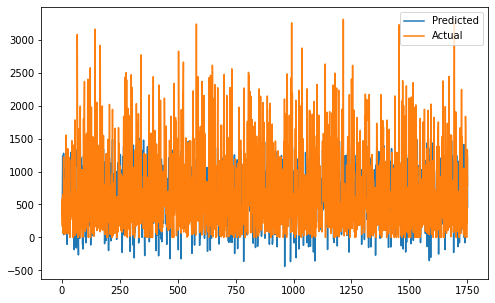

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()